# Pryngles Tutorials: Developers
## Part 4 - Modules Body and System

This notebook illustrate in detail the interface of the `Pryngles` package. It is especially intended for developers.

Authors:
- Jorge I. Zuluaga, [jorge.zuluaga@udea.edu.co](mailto:jorge.zuluaga@udea.edu.co)

Warnings:
- This file was prepared using version 0.7.3.1 of `Pryngles`.
- Matplotlib commands run in version 3.5.2.

<center><font color='red' size='8'><i>This tutorial is under construction.</i></font></center>

## Preparation

Before running this tutorial you need to install `Pryngles`:

In [1]:
#!python -m pip install -qU pryngles
#!pip show pryngles

If you are running this tutrial in `Google Colab` please run the following lines:

In [2]:
"""
import matplotlib.pyplot as plt
RESOLUTION = 150
%matplotlib inline
plt.rcParams['figure.dpi'] = RESOLUTION
# Sometimes you need to run twice this magic to be sure the backend is loaded
%matplotlib inline
#""";

## Import useful packages

In [1]:
%load_ext autoreload
%autoreload 2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Although it is not a good practice to import everything of a package, for this tutorial and to avoid excesively large names we will import everything from Pryngles:

In [2]:
from pryngles import *

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Core modules

## System (`system`)

`System` is probably the most important module in `Pryngles`.  Using System you will be able to create a planetary system and spangle it. You can also be able to simulate realistically the motion of the objects using Rebound. 

To create a system use:

In [31]:
sys=System()
print("Nbodies = ",sys.nbodies)
print("G constant = ",sys.G)
print("G constant = ",sys.units)
print("Canonical units = ",sys.ul,sys.um,sys.ut)

Nbodies =  0
G constant =  0.9999999999999997
G constant =  ['au', 'msun', 'yr2pi']
Canonical units =  149597870700.0 1.9884754159665356e+30 5022642.89091303


As you can see the most important aspects of the System is set from the beginning, including the canonical units used by the system.  You can set the units using:

In [37]:
sys=System(units=["au","msun","day"])
print("G constant = ",sys.G)
print("G constant = ",sys.units)
print("Canonical units = ",sys.ul,sys.um,sys.ut)

G constant =  0.00029591220828559104
G constant =  ['au', 'msun', 'day']
Canonical units =  149597870700.0 1.9884754159665356e+30 86400.0


Once you have created a system add particles:

In [38]:
S=sys.add(name="Star")
print(sys)

{'sim': None, 'bodies': OrderedDict([('Star', <pryngles.body.Star object at 0x7f851cb0b250>)]), 'root': <pryngles.body.Star object at 0x7f851cb0b250>, 'source': None, 'center_source': array([0, 0, 0]), 'orbital_configuration': None, 'n_obs': array([0, 0, 1]), 'alpha_obs': 0, 'center_obs': None, 'sg': None, 'units': ['au', 'msun', 'day'], 'ul': 149597870700.0, 'um': 1.9884754159665356e+30, 'G': 0.00029591220828559104, 'ut': 86400.0, 'nbodies': 1}


If you don't specify nothing a new star is added to the system.

You may update the properties of an object:

In [39]:
S.update_body(m=3,radius=0.5)
print(sys.bodies["Star"])

{'kind': 'Star', 'name': 'Star', 'childs': {}, 'name_by_kind': True, 'm': 3, 'radius': 0.5, 'prot': 1, 'i': 0, 'roll': 0, 'alpha': 0, 'q0': 0, 'nspangles': 1000, 'spangle_type': 6, 'shape': 'sphere', 'geometry_args': {}, 'seed': 0, 'preset': True, 'primary': None, 'optics': {}, 'orbit': {}, 'physics': {}, 'limb_coeffs': [], 'elements': {'m': 3}, 'wrot': 6.283185307179586, 'n_equ': array([6.123234e-17, 0.000000e+00, 1.000000e+00]), 'norm_limb_darkening': 3.141592653589793, 'rbhash': 'Star'}


Notice that the object has a new mass.  Now you can add new objects:

In [40]:
P=sys.add("Planet",name="Planet",primary=S,radius=0.1,a=5)

Notice that you need to indicate the object pointing to the primary.

In [41]:
M=sys.add("Planet",name="Moon",primary=P,radius=0.1,a=1)
R=sys.add("Ring",name="Ring",parent=P,fi=1.3,fe=2.3,i=20*Consts.deg)

Once you have added objects you can initialize orbit:

In [42]:
sys.initialize_simulation()

Check the orbits:

<IPython.core.display.Javascript object>


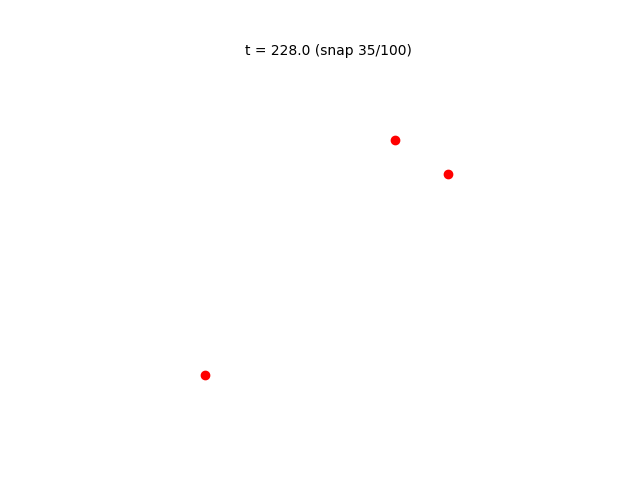

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 827.34it/s]


In [43]:
Plot.animate_rebound(sys.sim)

Once a system is created you may check the status of Rebound:

In [44]:
sys.sim.status()

---------------------------------
REBOUND version:     	3.19.3
REBOUND built on:    	May  7 2022 18:49:54
Number of particles: 	3
Selected integrator: 	ias15
Simulation time:     	6.6383663234209541e+02
Current timestep:    	3.399515
---------------------------------
<rebound.particle.Particle object at 0x7f852b139040, m=3.0 x=1.322492041502569 y=-1.4851932727454307 z=0.0 vx=0.005172215161969294 vy=0.004622265099185984 vz=0.0>
<rebound.particle.Particle object at 0x7f852b139740, m=1.0 x=-1.6588644613015044 y=2.5964707501944666 z=0.0 vx=-0.01679907154219926 vy=0.0011469033925121676 vz=0.0>
<rebound.particle.Particle object at 0x7f852b139040, m=1.0 x=-2.308611663206202 y=1.8591090680418259 z=0.0 vx=0.001282426056291378 vy=-0.01501369869007012 vz=0.0>
---------------------------------


At any time you may save the system:

In [45]:
sys.save_to("/tmp/system.pkl")

When pickling a system sabes two files: a `.pkl` file with the `System` object and a `.pkl.rbin` with the `Rebound` simulation.

In [46]:
!ls /tmp/system.*

/tmp/system.pkl      /tmp/system.pkl.rbin /tmp/system.py


Yo may recover a simulation using:

Once you have the system defined, spangle it:

In [47]:
print(sys.nbodies)

4


In [48]:
sys.spangle_system()

<IPython.core.display.Javascript object>


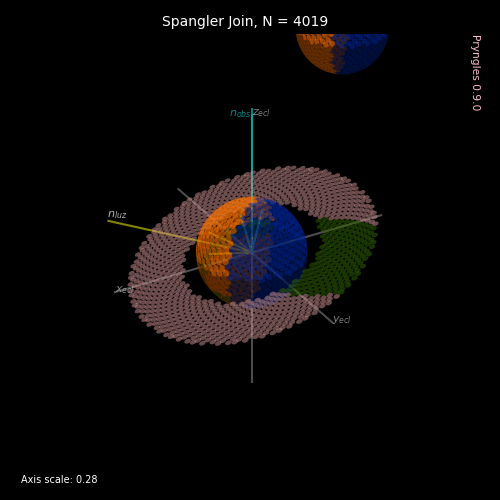

In [51]:
sys.sg.plot3d(center_at="Ring")

<IPython.core.display.Javascript object>


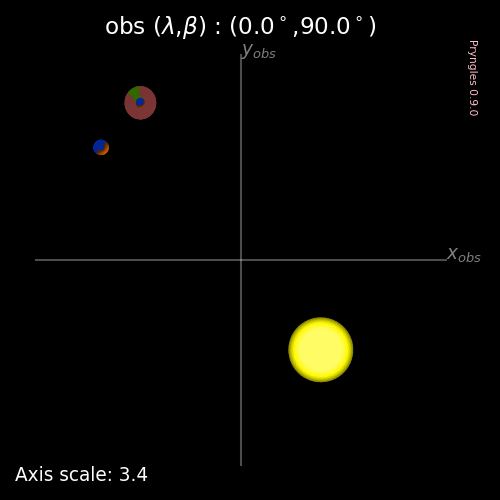

(0, 0)

In [52]:
sys.sg.plot2d()

--- 
*The authors*, Last update: october, 2022.